LOADING AND READING DATASET

In [3]:
# Import Pandas as pd
import pandas as pd

# Load dataset
file_path = r'C:\Users\SusannaBeatson\Desktop\My Projects\Python - Superstore dataset\Global_Superstore.xlsx'
orders = pd.read_excel(file_path, sheet_name='Orders')
returns = pd.read_excel(file_path, sheet_name= 'Returns')
people = pd.read_excel(file_path, sheet_name= 'People')

orders.head()
#returns.head()
#people.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ID-0,2016-01-01,2016-01-02,First Class,CUST-0,Home Office,United States,Chicago,New York,10001,East,PROD-0,Technology,Chairs,Product B,191.69,6,0.22,4.70
1,ID-1,2016-01-02,2016-01-03,Same Day,CUST-1,Consumer,United States,Houston,California,10001,West,PROD-1,Office Supplies,Chairs,Product A,460.17,7,0.05,-38.11
2,ID-2,2016-01-03,2016-01-04,Second Class,CUST-2,Consumer,United States,Los Angeles,New York,77001,West,PROD-2,Technology,Chairs,Product B,208.22,8,0.14,195.24
3,ID-3,2016-01-04,2016-01-05,First Class,CUST-3,Home Office,United States,New York,New York,60601,East,PROD-3,Technology,Chairs,Product B,373.29,1,0.04,109.61
4,ID-4,2016-01-05,2016-01-06,Same Day,CUST-4,Consumer,United States,Houston,New York,60601,South,PROD-4,Technology,Phones,Product D,86.84,8,0.11,-49.52


GROUP AND SUMMARIZE BY SEGMENT

In [4]:
segment_summary = orders.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).reset_index()

# Calculate profit margin and average order value
segment_summary['Profit Margin (%)'] = (segment_summary['Profit'] / segment_summary['Sales']) * 100
segment_summary['Average Order Value'] = segment_summary['Sales'] / segment_summary['Order ID']

segment_summary = segment_summary.sort_values(by='Sales', ascending=False)
segment_summary


,Segment,Sales,Profit,Order ID,Profit Margin (%),Average Order Value
1,Corporate,88740.13,26812.34,343,30.214448,258.717580
0,Consumer,86521.70,24194.59,337,27.963609,256.740950
2,Home Office,80335.40,23190.09,320,28.866589,251.048125


VISUALIZE SALES, PROFIT AND MARGIN BY SEGMENT

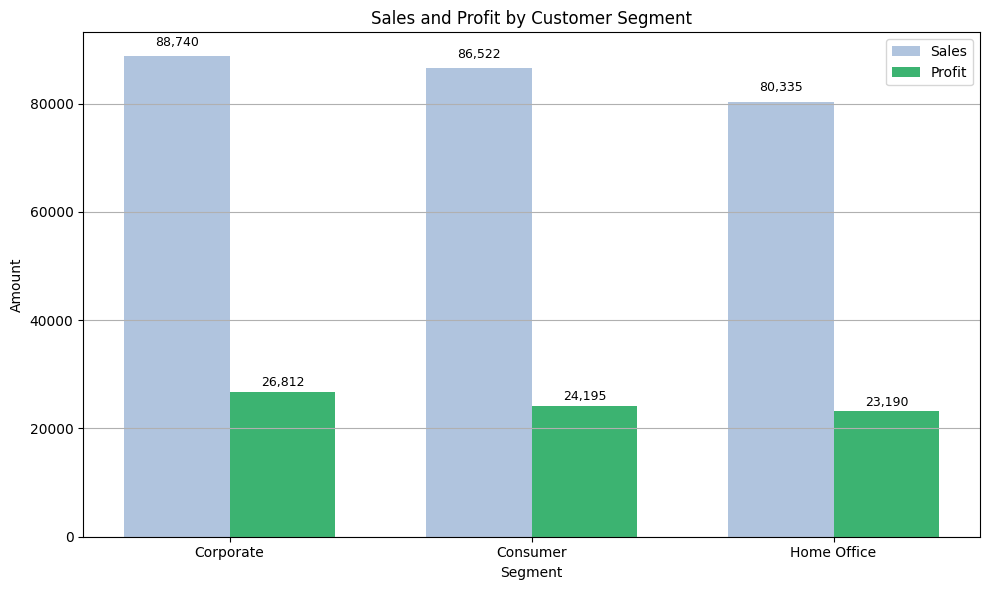

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(segment_summary['Segment']))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, segment_summary['Sales'], width, label='Sales', color='lightsteelblue')
plt.bar(x + width/2, segment_summary['Profit'], width, label='Profit', color='mediumseagreen')

# Annotate
for i in range(len(x)):
    plt.text(x[i] - width/2, segment_summary['Sales'].iloc[i] + 2000,
             f"{segment_summary['Sales'].iloc[i]:,.0f}", ha='center', fontsize=9)
    plt.text(x[i] + width/2, segment_summary['Profit'].iloc[i] + 1000,
             f"{segment_summary['Profit'].iloc[i]:,.0f}", ha='center', fontsize=9)

plt.xticks(x, segment_summary['Segment'])
plt.title('Sales and Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


PLOT PROFIT MARGIN

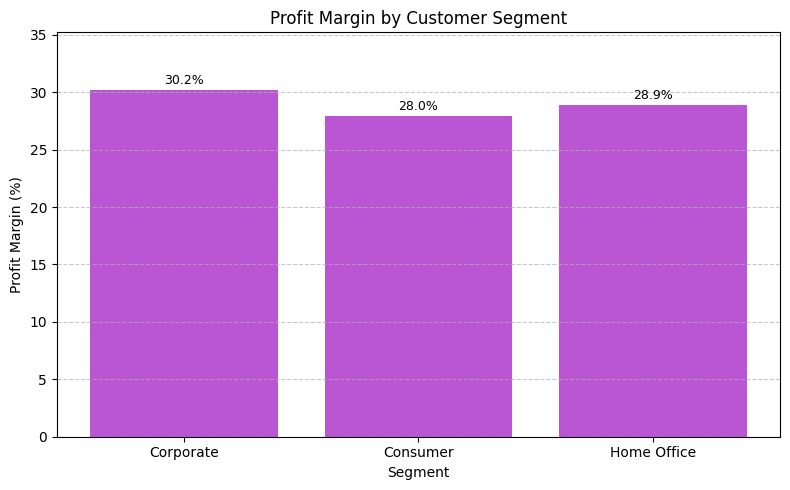

In [6]:
plt.figure(figsize=(8, 5))
bars = plt.bar(segment_summary['Segment'], segment_summary['Profit Margin (%)'], color='mediumorchid')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', fontsize=9)

plt.title('Profit Margin by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Profit Margin (%)')
plt.ylim(0, segment_summary['Profit Margin (%)'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


TIME SERIES ANALYSIS OF MONTHLY DATA PER SEGMENT

In [7]:
# Extract year-month from Order Date
orders['Month'] = orders['Order Date'].dt.to_period('M')

# Group by month and segment, then sum sales
monthly_segment_sales = orders.groupby(['Month', 'Segment'])['Sales'].sum().reset_index()

# Convert Month back to datetime for plotting
monthly_segment_sales['Month'] = monthly_segment_sales['Month'].dt.to_timestamp()


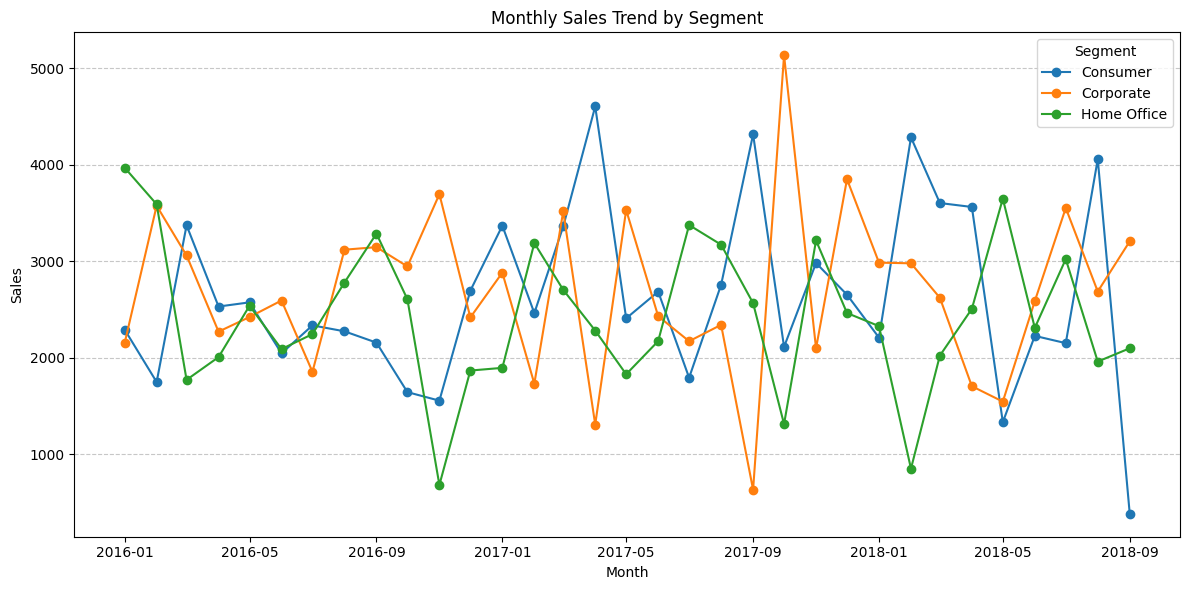

In [8]:
plt.figure(figsize=(12, 6))

# Loop through each segment and plot its line
for segment in monthly_segment_sales['Segment'].unique():
    data = monthly_segment_sales[monthly_segment_sales['Segment'] == segment]
    plt.plot(data['Month'], data['Sales'], marker='o', label=segment)

plt.title('Monthly Sales Trend by Segment')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Segment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
